# README

## Introduction

The `mcm` function is a tool for analyzed different metrics from a confusion matrix. 

This function depends of `pandas` and the function `confusion_matrix` from `sklearn.metrics`.

In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
?confusion_matrix

Signature:
confusion_matrix(
    y_true,
    y_pred,
    *,
    labels=None,
    sample_weight=None,
    normalize=None,
)
Docstring:
Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` and
predicted to be in group :math:`j`.

Thus in binary classification, the count of true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

Read more in the :ref:`User Guide <confusion_matrix>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,)
    Estimated targets as returned by a classifier.

labels : array-like of shape (n_classes), default=None
    List of labels to index the matrix. This may be used to reorder
    or select a subset of labels.
    If

In [3]:
data = pd.DataFrame({
    'y_true': ['Positive']*47 + ['Negative']*18,
    'y_pred': ['Positive']*37 + ['Negative']*10 + ['Positive']*5 + ['Negative']*13})

In [4]:
confusion_matrix(y_true = data.y_true, 
                 y_pred = data.y_pred, 
                 labels = ['Negative', 'Positive'])

array([[13,  5],
       [10, 37]])

In this case, from the confusion matrix we have the following results:

  * True Positive (TP): 34
  * True Negative (TN): 13
  * False Positive (FP): 5
  * False Negative (FN): 10
    

In [5]:
tn, fp, fn, tp = confusion_matrix(y_true = data.y_true, 
                                  y_pred = data.y_pred, 
                                  labels = ['Negative', 'Positive']).ravel()

In [6]:
(tn, fp, fn, tp)

(13, 5, 10, 37)

## MCM function

The `mcm`has been developed as:

In [10]:
def mcm(tn, fp, fn, tp):
    """Let be a confusion matrix like this:


      N    P
    +----+----+
    |    |    |
    | TN | FP |
    |    |    |
    +----+----+
    |    |    |
    | FN | TP |
    |    |    |
    +----+----+

    The observed values by columns and the expected values
    by rows and the positive class in right column.
    With these definitions, the TN, FP, FN and TP values are that order.


    Parameters
    ----------
    TN : integer
         True Negatives (TN) is the total number of outcomes where the model correctly predicts the negative class.
    FP : integer
         False Positives (FP) is the total number of outcomes where the model incorrectly predicts the positive class.
    FN : integer
         False Negatives (FN) is the total number of outcomes where the model incorrectly predicts the negative class.
    TP : integer
         True Positives (TP) is the total number of outcomes where the model correctly predicts the positive class.

    Returns
    -------
    sum : DataFrame
          DataFrame with several metrics

    Notes
    -----
    https://en.wikipedia.org/wiki/Confusion_matrix
    https://developer.lsst.io/python/numpydoc.html
    https://www.mathworks.com/help/risk/explore-fairness-metrics-for-credit-scoring-model.html

    Examples
    --------
    data = pd.DataFrame({
    'y_true': ['Positive']*47 + ['Negative']*18,
    'y_pred': ['Positive']*37 + ['Negative']*10 + ['Positive']*5 + ['Negative']*13})

    tn, fp, fn, tp = confusion_matrix(y_true = data.y_true,
                                  y_pred = data.y_pred,
                                  labels = ['Negative',
                                  'Positive']).ravel()

    """
    df_mcm = []

    df_mcm.append(['Sensitivity', tp / (tp + fn)])
    df_mcm.append(['Recall', tp / (tp + fn)])
    df_mcm.append(['True Positive rate (TPR)', tp / (tp + fn)])
    df_mcm.append(['Specificity', tn / (tn + fp)])
    df_mcm.append(['True Negative Rate (TNR)', tn / (tn + fp)])

    df_mcm.append(['Precision', tp / (tp + fp)])
    df_mcm.append(['Positive Predictive Value (PPV)', tp / (tp + fp)])
    df_mcm.append(['Negative Predictive Value (NPV)', tn / (tn + fn)])

    df_mcm.append(['False Negative Rate (FNR)', fn / (fn + tp)])
    df_mcm.append(['False Positive Rate (FPR)', fp / (fp + tn)])
    df_mcm.append(['False Discovery Rate (FDR)', fp / (fp + tp)])

    df_mcm.append(['Rate of Positive Predictions (PRR)', (fp + tp) / (tn + tp + fn + fp)])
    df_mcm.append(['Rate of Negative Predictions (RNP)', (fn + tn) / (tn + tp + fn + fp)])

    df_mcm.append(['Accuracy', (tp + tn) / (tp + tn + fp + fn)])
    df_mcm.append(['F1 Score', 2*tp / (2*tp + fp + fn)])

    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)

    df_mcm.append(['Positive Likelihood Ratio (LR+)', tpr / fpr])
    df_mcm.append(['Negative Likelihood Ratio (LR-)', fnr / tnr])

    return pd.DataFrame(df_mcm, columns = ['Metric', 'Value'])



In [11]:
?mcm

Signature: mcm(tn, fp, fn, tp)
Docstring:
Let be a confusion matrix like this:


  N    P
+----+----+
|    |    |
| TN | FP |
|    |    |
+----+----+
|    |    |
| FN | TP |
|    |    |
+----+----+

The observed values by columns and the expected values
by rows and the positive class in right column.
With these definitions, the TN, FP, FN and TP values are that order.


Parameters
----------
TN : integer
     True Negatives (TN) is the total number of outcomes where the model correctly predicts the negative class.
FP : integer
     False Positives (FP) is the total number of outcomes where the model incorrectly predicts the positive class.
FN : integer
     False Negatives (FN) is the total number of outcomes where the model incorrectly predicts the negative class.
TP : integer
     True Positives (TP) is the total number of outcomes where the model correctly predicts the positive class.

Returns
-------
sum : DataFrame
      DataFrame with several metrics

Notes
-----
https://en.wikip

The arguments of `mcm` function are: true positive (tn), false positive (fp), false negative (fn) and true positive (tp) is this order.

In [12]:
mcm(tn, fp, fn, tp)

,Metric,Value
0,Sensitivity,0.787234
1,Recall,0.787234
2,True Positive rate (TPR),0.787234
3,Specificity,0.722222
4,True Negative Rate (TNR),0.722222
5,Precision,0.880952
6,Positive Predictive Value (PPV),0.880952
7,Negative Predictive Value (NPV),0.565217
8,False Negative Rate (FNR),0.212766
9,False Positive Rate (FPR),0.277778


### Bootstrap

We can call the function `mcm` several times with a percentage of samples and estimate the distribution of each metrics.

In the following example, a 80% of the samples has been used in each iteration.

In [13]:
data = pd.DataFrame({
    'y_true': ['Positive']*47 + ['Negative']*18,
    'y_pred': ['Positive']*37 + ['Negative']*10 + ['Positive']*5 + ['Negative']*13})

In [30]:
mcm_bootstrap = []

for i in range(500):
    aux = data.sample(frac = 0.8) # 80% of the samples
    tn, fp, fn, tp =\
        confusion_matrix(y_true = aux.y_true, 
                         y_pred = aux.y_pred, 
                         labels = ['Negative', 'Positive']).ravel()

    mcm_bootstrap.append(mcm(tn, fp, fn, tp))

After 100 iterations we can be evaluate the mean, median, minimum, maximum and standar deviation for each metric.

In [31]:
pd\
    .concat(mcm_bootstrap)\
    .groupby('Metric')\
    .agg({'Value' : ['mean', 'median', 'min', 'max', 'std']})

Value                                 
                                        mean    median       min       max   
Metric                                                                       
Accuracy                            0.769423  0.769231  0.711538  0.826923  \
F1 Score                            0.830781  0.828571  0.769231  0.883117   
False Discovery Rate (FDR)          0.120614  0.121212  0.055556  0.166667   
False Negative Rate (FNR)           0.212029  0.210526  0.131579  0.285714   
False Positive Rate (FPR)           0.278755  0.285714  0.142857  0.454545   
Negative Likelihood Ratio (LR-)     0.295672  0.294840  0.184211  0.416667   
Negative Predictive Value (NPV)     0.568801  0.571429  0.375000  0.722222   
Positive Likelihood Ratio (LR+)     2.942235  2.855263  1.824390  5.710526   
Positive Predictive Value (PPV)     0.879386  0.878788  0.833333  0.944444   
Precision                           0.879386  0.878788  0.833333  0.944444   
Rate of Negative Predictions (RNP)  0.354346  0.365385  0.250000  0.423077   
Rate of Positive Predictions (PRR)  0.645654  0.634615  0.576923  0.750000   
Recall                              0.787971  0.789474  0.714286  0.868421   
Sensitivity                         0.787971  0.789474  0.714286  0.868421   
Specificity                         0.721245  0.714286  0.545455  0.857143   
True Negative Rate (TNR)            0.721245  0.714286  0.545455  0.857143   
True Positive rate (TPR)            0.787971  0.789474  0.714286  0.868421   

                                              
                                         std  
Metric                                        
Accuracy                            0.026687  
F1 Score                            0.022230  
False Discovery Rate (FDR)          0.024679  
False Negative Rate (FNR)           0.031126  
False Positive Rate (FPR)           0.053325  
Negative Likelihood Ratio (LR-)     0.049432  
Negative Predictive Value (NPV)     0.054842  
Positive Likelihood Ratio (LR+)     0.641786  
Positive Predictive Value (PPV)     0.024679  
Precision                           0.024679  
Rate of Negative Predictions (RNP)  0.030707  
Rate of Positive Predictions (PRR)  0.030707  
Recall                              0.031126  
Sensitivity                         0.031126  
Specificity                         0.053325  
True Negative Rate (TNR)            0.053325  
True Positive rate (TPR)            0.031126

## Display

Loading the matplotlib and seaborn to display the results.

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

For example, if we want to display the distribution of accuracy we can execute the follwoing code.

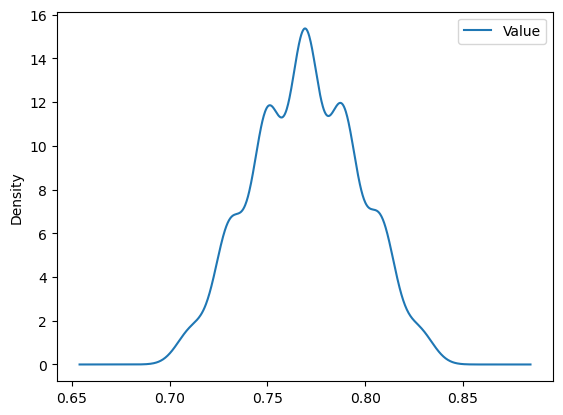

In [33]:
aux = pd.concat(mcm_bootstrap)
aux\
    .query('Metric == "Accuracy"')\
    .plot(kind = 'density', label = 'Accuracy')
plt.show()

With seaborn is easy to display the distribution of all metrics.

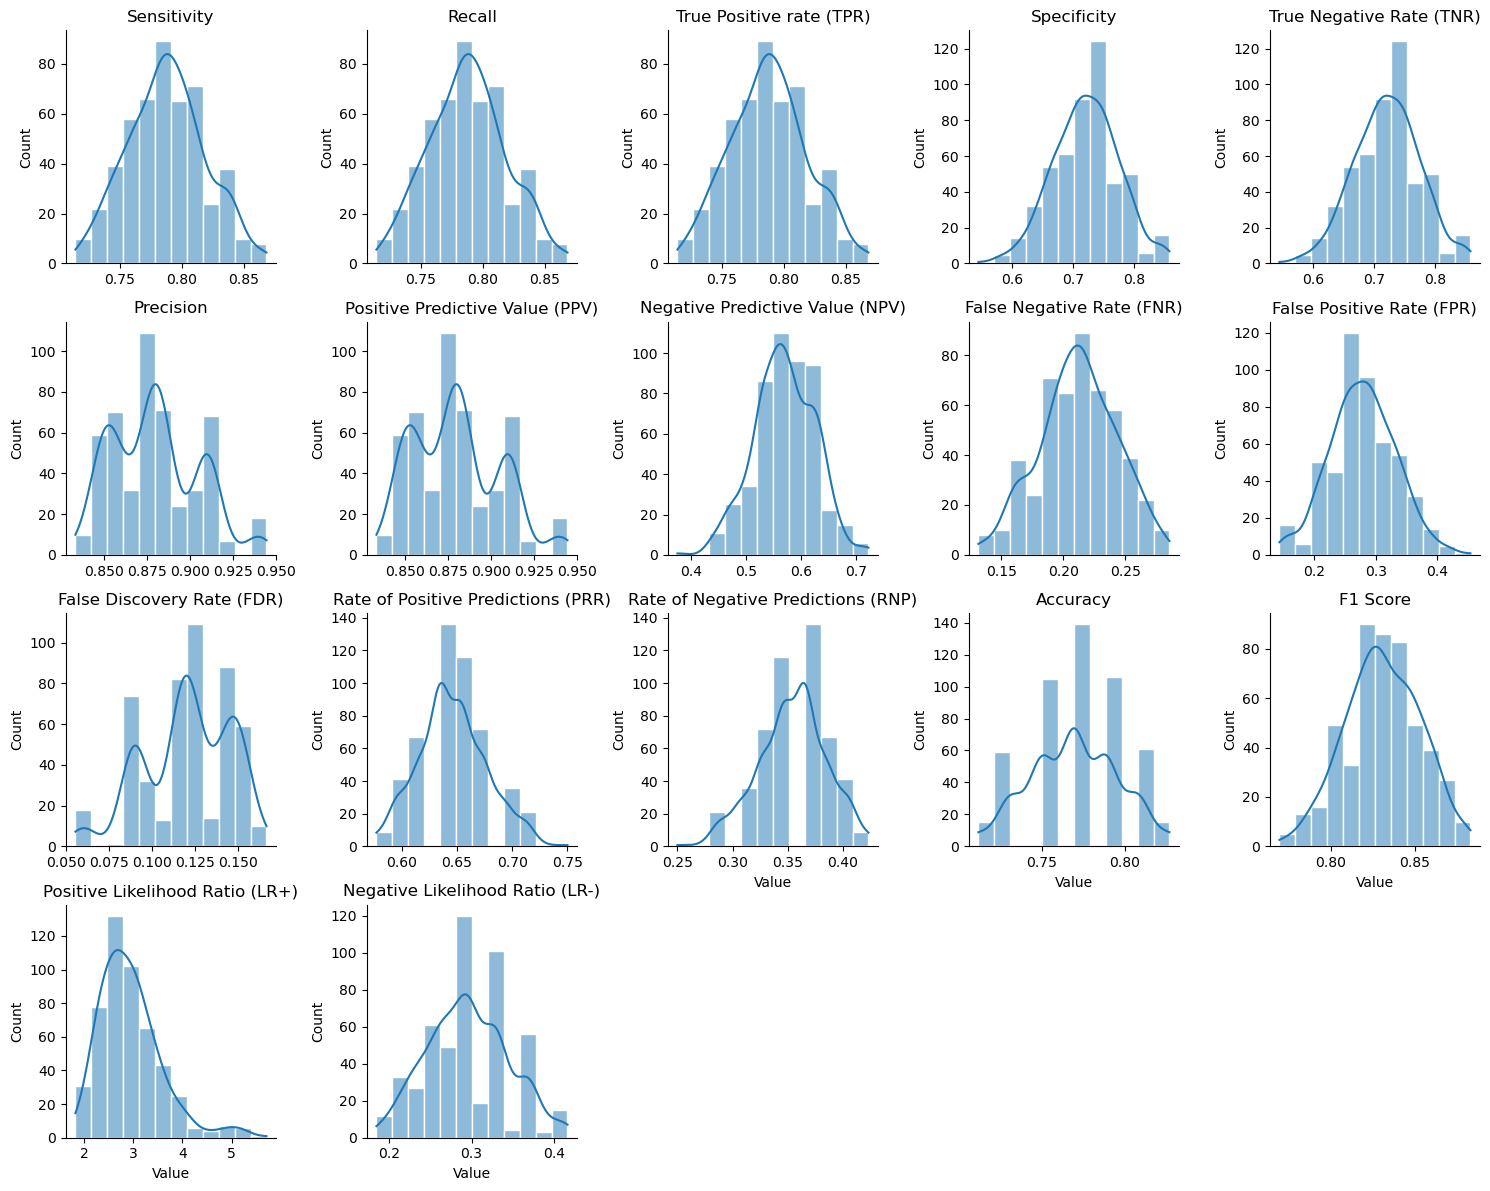

In [34]:
g = sns.FacetGrid(pd.concat(mcm_bootstrap), 
                  col = 'Metric', 
                  col_wrap = 5, 
                  sharey = False, 
                  sharex = False)
g = g.map(sns.histplot, 'Value', bins = 12, kde = True, ec = 'white', )
g = g.set_titles('{col_name}', size = 12)

The `mcm` function can help us to analyse a confusion matrix. If this confusion matrix come from a performed model, we can evaluate it with this function: Sensitivity and Specificity as principal metrics.